In [2]:
import matplotlib.pyplot as plt

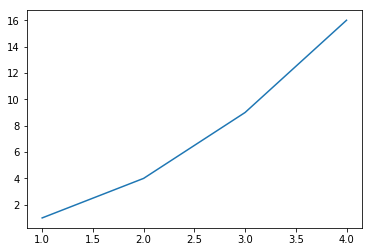

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

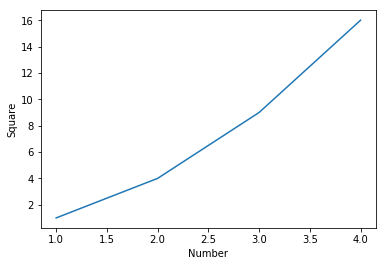

In [3]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('Number')
plt.ylabel('Square')
plt.show()

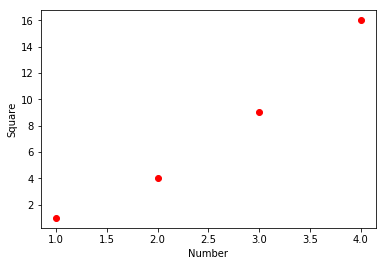

In [4]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16],'ro') #By default 'b-', It is optional
plt.xlabel('Number')
plt.ylabel('Square')
plt.show()

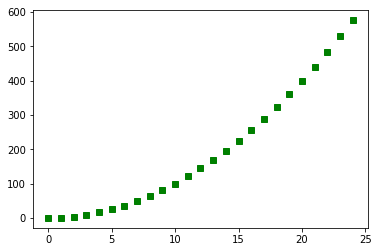

In [5]:
x=[i for i in range(0,25,1)]
y=[i**2 for i in x]
plt.plot(x,y,'gs') #'g^'
plt.show()

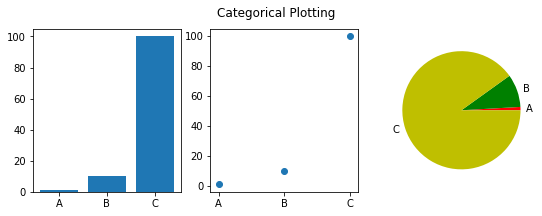

In [7]:
names1 = ['A', 'B', 'C']
values = [1, 10, 100]

plt.figure(figsize=(9, 3))

plt.subplot(1,3,1)
plt.bar(names1, values)

plt.subplot(1,3,2)
plt.scatter(names1, values)

plt.subplot(1,3,3)
plt.pie( values,labels=names1,colors=['r','g','y'])

plt.suptitle('Categorical Plotting')
plt.show()

# Heart disease dataset


<p id='2'><h3>DATASET COLUMNS FEATURE EXPLAIN</h3></p>
<ul>
    <li>Age (age in years)</li>
    <li>Sex (1 = male; 0 = female)</li>
    <li>CP (chest pain type)</li>
    <li>TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>CHOL (serum cholestoral in mg/dl)</li>
    <li>FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>RESTECH (resting electrocardiographic results)</li>
    <li>THALACH (maximum heart rate achieved)</li>
    <li>EXANG (exercise induced angina (1 = yes; 0 = no))</li>
    <li>OLDPEAK (ST depression induced by exercise relative to rest)</li>
    <li>SLOPE (the slope of the peak exercise ST segment)</li>
    <li>CA (number of major vessels (0-3) colored by flourosopy)</li>
    <li>THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>TARGET (1 or 0)</li>
</ul>

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
dic={'name':['Dhanush','Vimal'],'age':[21,55]}
df=pd.DataFrame(data=dic) #A table
df #Two ways of accessing

,name,age
0,Dhanush,21
1,Vimal,55


In [11]:
data=pd.read_csv('./heart.csv')
data.shape

(303, 14)

In [12]:
data.sample(5) #tail,head

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1


In [12]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [13]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [14]:
data['Cp'].isnull().sum()

0

In [15]:
data.Age.value_counts()[:10] #(index,value)

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

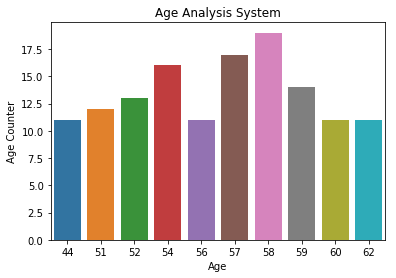

In [16]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

In [17]:
#firstly find min and max ages
minAge=min(data['Age'])
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [18]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


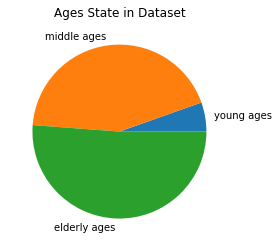

In [19]:
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'])
plt.title('Ages State in Dataset')
plt.show()

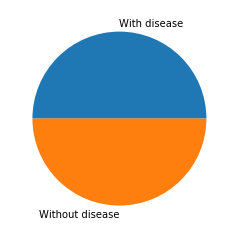

In [20]:
plt.pie([len(data.Target==1),len(data.Target==0)],labels=['With disease','Without disease'])
plt.show()

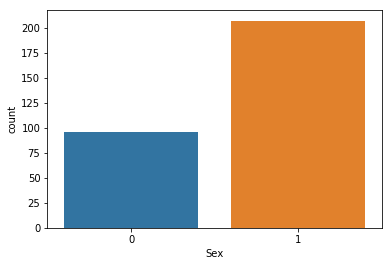

In [21]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

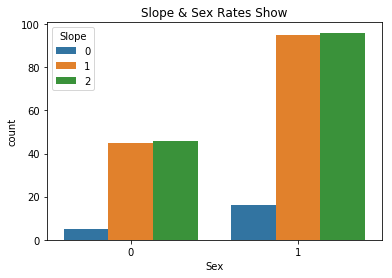

In [22]:
sns.countplot(data.Sex,hue=data.Slope)
plt.title('Slope & Sex Rates Show')
plt.show()

In [23]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Total Genders : 303
Male Count    : 207
Female Count  : 96
Male State: 68.32%
Female State: 31.68%


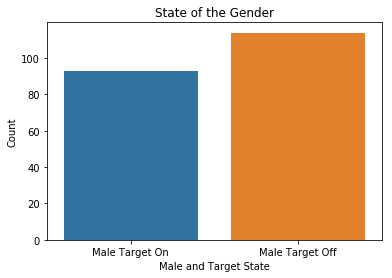

In [24]:
#Male State & target 1 & 0
male_andtarget_on=len(data[(data.Sex==1)&(data['Target']==1)])
male_andtarget_off=len(data[(data.Sex==1)&(data['Target']==0)])

sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

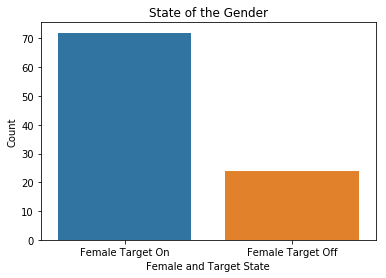

In [25]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])

sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

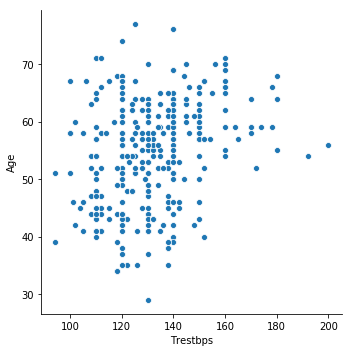

In [26]:
sns.relplot(x="Trestbps", y="Age",
            sizes=(40, 400),
            data=data) #[data.Target==0]

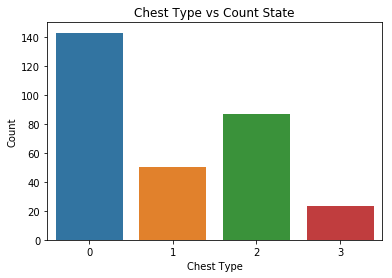

In [27]:
#There are 4 types of chest pain
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()